# A/B-тестирование

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import warnings
warnings.filterwarnings('ignore')

**Задача:** провести оценку результатов A/B-теста

## Загрузка и обзор файлов

Для A/B тестирования предоставлены следующие данные

ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год.
- name — название маркетингового события;
- regions — регионы, в которых будет проводиться рекламная кампания;
- start_dt — дата начала кампании;
- A/B-тестирование 3 finish_dt — дата завершения кампании.

final_ab_new_users.csv — пользователи, зарегистрировавшиеся с 7 по 21 декабря2020 года.
- user_id — идентификатор пользователя;
- first_date — дата регистрации;
- region — регион пользователя;
- device — устройство, с которого происходила регистрация.

final_ab_events.csv — действия новых пользователей в период с 7 декабря 2020 по4 января 2021 года.
- user_id — идентификатор пользователя;
- event_dt — дата и время покупки;
- event_name — тип события;
- details — дополнительные данные о событии. Например, для покупок,purchase, в этом поле хранится стоимость покупки в долларах.

final_ab_participants.csv — таблица участников тестов.
- user_id — идентификатор пользователя;
- ab_test — название теста;
- group — группа пользователя.

In [2]:
marketing_events = pd.read_csv('ab_project_marketing_events.csv')
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [3]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
events=pd.read_csv('final_ab_events.csv')
events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [6]:
events.duplicated().sum()

0

In [7]:
events.query('event_name=="purchase"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62740 entries, 0 to 62739
Data columns (total 4 columns):
user_id       62740 non-null object
event_dt      62740 non-null object
event_name    62740 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [8]:
new_users=pd.read_csv('final_ab_new_users.csv')
new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [9]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [10]:
new_users.duplicated().sum()

0

In [11]:
participants=pd.read_csv('final_ab_participants.csv')
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [12]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [13]:
events.duplicated().sum()

0

Проверка показала, что дубликатов и пропущенных значений в файлах нет

Переведем даты из текстового формата в тип даты 

In [14]:
events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null datetime64[ns]
event_name    440317 non-null object
details       62740 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [15]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


## Подготовка данных для теста

Нас интересуют данные только для теста recommender_system_test. Сделаем их отбор из всех данных.

In [16]:
participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

In [17]:
our_participants=participants.query('ab_test == "recommender_system_test"')
our_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


In [18]:
list_our_participants = our_participants['user_id']

In [19]:
our_users = new_users.loc[new_users['user_id'].isin(list_our_participants)]
our_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
13,E6DE857AFBDC6102,2020-12-07,EU,PC
20,DD4352CDCF8C3D57,2020-12-07,EU,Android
23,831887FE7F2D6CBA,2020-12-07,EU,Android
39,4CB179C7F847320B,2020-12-07,EU,iPhone
...,...,...,...,...
61685,A09DFE27D4CFF8E8,2020-12-20,EU,Android
61693,0F7D49FC184EDCDE,2020-12-20,EU,PC
61709,574ACBC674BC385D,2020-12-20,EU,Mac
61710,0416B34D35C8C8B8,2020-12-20,EU,Android


Добавим сведения о группах

In [20]:
group_a = our_participants.query('group=="A"')['user_id']
group_b = our_participants.query('group=="B"')['user_id']

In [21]:
our_users['group'] =""
our_users.loc[our_users['user_id'].isin(group_a),'group']="A"
our_users.loc[our_users['user_id'].isin(group_b),'group']="B"
our_users.head()

,user_id,first_date,region,device,group
0,D72A72121175D8BE,2020-12-07,EU,PC,A
13,E6DE857AFBDC6102,2020-12-07,EU,PC,B
20,DD4352CDCF8C3D57,2020-12-07,EU,Android,B
23,831887FE7F2D6CBA,2020-12-07,EU,Android,A
39,4CB179C7F847320B,2020-12-07,EU,iPhone,B


Проверим все ли в заданном диапазоне регистрации

In [22]:
our_users.query('group=="A"').sort_values(by='first_date')

,user_id,first_date,region,device,group
0,D72A72121175D8BE,2020-12-07,EU,PC,A
3708,27802765D2458B2B,2020-12-07,EU,iPhone,A
3697,E3E47B8FBDF4EF63,2020-12-07,EU,Android,A
3695,07F90C8E398C5655,2020-12-07,EU,PC,A
3689,9B1F030CA887DAE6,2020-12-07,EU,iPhone,A
...,...,...,...,...,...
13102,B41D32C34490522C,2020-12-21,EU,Android,A
13088,C26D3BB63817A267,2020-12-21,EU,Android,A
13087,C18F8E6B295095EE,2020-12-21,EU,PC,A
12694,D649423E43336656,2020-12-21,EU,PC,A


In [23]:
our_users.query('group=="B"').sort_values(by='first_date')

,user_id,first_date,region,device,group
13,E6DE857AFBDC6102,2020-12-07,EU,PC,B
3608,F9945FBF588762BE,2020-12-07,EU,Android,B
3611,C845E42170625895,2020-12-07,EU,PC,B
3687,1AA90C1AD5727610,2020-12-07,EU,Mac,B
3699,9C2D0067A991213E,2020-12-07,EU,PC,B
...,...,...,...,...,...
13444,BADD0646825F4DB5,2020-12-21,EU,iPhone,B
13409,763DEEB7EA385F29,2020-12-21,EU,Android,B
13400,32A2ABB01257F04B,2020-12-21,EU,PC,B
13653,D2BF86D9C385D6B9,2020-12-21,EU,PC,B


Посмотрим численность пользователей

In [24]:
new_users['region'].value_counts() 

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [25]:
our_users['region'].value_counts()

EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64

По условию должен быть region =="EU"

In [26]:
our_users=our_users.query('region =="EU"')
our_users

,user_id,first_date,region,device,group
0,D72A72121175D8BE,2020-12-07,EU,PC,A
13,E6DE857AFBDC6102,2020-12-07,EU,PC,B
20,DD4352CDCF8C3D57,2020-12-07,EU,Android,B
23,831887FE7F2D6CBA,2020-12-07,EU,Android,A
39,4CB179C7F847320B,2020-12-07,EU,iPhone,B
...,...,...,...,...,...
61685,A09DFE27D4CFF8E8,2020-12-20,EU,Android,B
61693,0F7D49FC184EDCDE,2020-12-20,EU,PC,A
61709,574ACBC674BC385D,2020-12-20,EU,Mac,A
61710,0416B34D35C8C8B8,2020-12-20,EU,Android,A


Проверим, нет ли пересечений в группах

In [27]:
group_a = our_users.query('group=="A"')['user_id'].to_frame()
group_b = our_users.query('group=="B"')['user_id'].to_frame()

In [28]:
errors_participants = group_a.merge(group_b,on='user_id', how='inner')
errors_participants

,user_id


In [29]:
print('participants A =',len(group_a),',  participants B =',len(group_b))

participants A = 3634 ,  participants B = 2717


Пересечений нет, но группы не равноценны

Добавим сведения о группах в events

In [30]:
group_a1 = our_users.query('group=="A"')['user_id']
group_b1 = our_users.query('group=="B"')['user_id']

In [31]:
events['group'] =""
events.loc[events['user_id'].isin(group_a1),'group']="A"
events.loc[events['user_id'].isin(group_b1),'group']="B"

In [32]:
events=events.query('group != ""')
events

,user_id,event_dt,event_name,details,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B
...,...,...,...,...,...
440239,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,NaN,A
440258,96BDD55846D1F7F6,2020-12-29 16:53:42,login,NaN,A
440267,553BAE96C6EB6240,2020-12-29 14:09:14,login,NaN,A
440281,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,NaN,B


Посмотрим, участвуют ли "наши люди" в других акциях

In [33]:
list_another_users=participants.query('ab_test != "recommender_system_test"')['user_id']
others_users= events['user_id'].loc[events['user_id'].isin(list_another_users)].unique()
#list_others_users = others_users['user_id'].unique()
#len(list_others_users)
len(others_users)

887

Участвуют, но сказали: не трогать.

## Воронка

Посмотрим, как распределились покупки за этот период

In [34]:
events

,user_id,event_dt,event_name,details,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B
...,...,...,...,...,...
440239,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,NaN,A
440258,96BDD55846D1F7F6,2020-12-29 16:53:42,login,NaN,A
440267,553BAE96C6EB6240,2020-12-29 14:09:14,login,NaN,A
440281,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,NaN,B


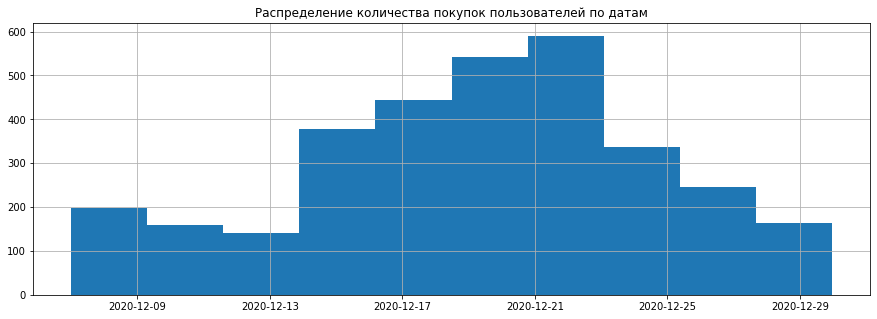

In [35]:
events.query('event_name=="purchase"')['event_dt'].hist(figsize=(15,5)).set_title('Распределение количества покупок пользователей по датам');

Christmas и Новый год  не самое лучшее время для независимых исследований

Посмотрим какие и сколько событий всего

In [36]:
events['event_name'].value_counts()

login           10595
product_page     6554
purchase         3196
product_cart     3075
Name: event_name, dtype: int64

In [37]:
groups_ab=events.groupby('group').agg({'user_id':['count','nunique']})
groups_ab.columns=['count','nunique']
groups_ab['per_one'] =round(groups_ab['count']/ groups_ab['nunique'],2)
groups_ab

,count,nunique,per_one
group,,,
A,18309,2604,7.03
B,5111,877,5.83


In [38]:
users_event=events.pivot_table(index='event_name',columns='group',values='user_id',aggfunc={'user_id': 'count'}).sort_values(by='B', ascending=False)
users_event

group,A,B
event_name,,
login,8124,2471
product_page,5227,1327
purchase,2536,660
product_cart,2422,653


In [39]:
users_event=events.pivot_table(index='event_name',columns='group',values='user_id',aggfunc={'user_id': 'nunique'}).sort_values(by='B', ascending=False)
users_event

group,A,B
event_name,,
login,2604,877
product_page,1685,493
purchase,833,249
product_cart,782,244


В группе А purchase > product_cart

In [40]:
events.pivot_table(index='user_id',columns='event_name',values='event_dt',aggfunc='count').fillna(0)

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,3.0,0.0,3.0,0.0
0010A1C096941592,4.0,0.0,4.0,4.0
00341D8401F0F665,2.0,0.0,0.0,0.0
003DF44D7589BBD4,5.0,5.0,5.0,0.0
00505E15A9D81546,5.0,0.0,0.0,0.0
...,...,...,...,...
FF5B24BCE4387F86,3.0,0.0,3.0,3.0
FF825C1D791989B5,4.0,4.0,0.0,0.0
FF8CF7057415EB29,2.0,0.0,2.0,0.0


Сразу видно, что есть случаи, когда залогинился и сразу заплатил (видимо, функция "купи в один клик), а значит на разных этапах могут быть разные люди

In [41]:
users_groups = events.pivot_table(
    index='group', columns='event_name', values='user_id', aggfunc='nunique')
users_groups

event_name,login,product_cart,product_page,purchase
group,,,,
A,2604,782,1685,833
B,877,244,493,249


In [42]:
total_users_group=pd.Series([len(group_a1),len(group_b1)],index=["A","B"])

In [43]:
user_convers=users_groups.div(total_users_group, axis='index', level=None, fill_value=None)
user_convers

event_name,login,product_cart,product_page,purchase
group,,,,
A,0.716566,0.215190,0.463676,0.229224
B,0.322782,0.089805,0.181450,0.091645


In [44]:
user_convers=user_convers.reindex(columns=['login', 'product_page', 'product_cart','purchase'])
user_convers

event_name,login,product_page,product_cart,purchase
group,,,,
A,0.716566,0.463676,0.215190,0.229224
B,0.322782,0.181450,0.089805,0.091645


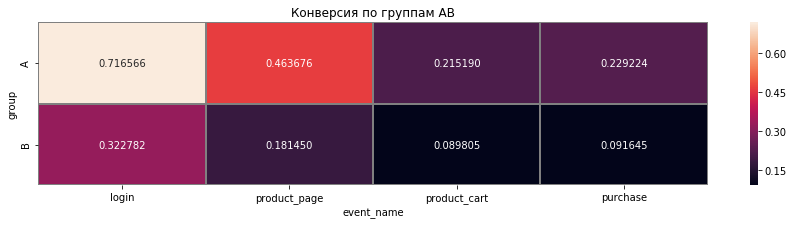

In [45]:
plt.figure(figsize=(15, 3))
plt.title('Конверсия по группам AB')
sns.set_style ({'text.color': '.01','xtick.color':'0.001','ytick.color':'0.001'})
sns.heatmap(user_convers, annot=True, fmt='.6f', linewidths=1, linecolor='gray') 

## Проверка гипотезы о равенстве долей

Нулевая гипотеза: конверсии в тестовой и контрольных группах равны.
Альтернативная: конверсии в тестовой и контрольных группах имеют статистически значимое отличие.    

Применим z-test. Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применим поправку Бонферрони.

In [46]:
def z_test (alpha,ind1,ind2,column,n):
    p1=user_convers.loc[ind1,column]
    p2=user_convers.loc[ind2,column]
    p_combined = (users_groups.loc[ind1,column] + users_groups.loc[ind2,column]) / (total_users_group[ind1] + total_users_group[ind2])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_users_group[ind1] + 1/total_users_group[ind2]))
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    bonferroni_alpha=alpha/n
    print('------------------------------------------------------------')
    print(bonferroni_alpha,'(Вonferroni)',ind1,ind2,column,'при n=',n)
    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    
    return print('p_value=',p_value)

 где alpha - уровень значимости, n - количество сравнений, ind1,ind2 - индекс строки таблицы
Установим уровень значимости alpha=0.05, проведем 4 сравнения.

In [47]:
z_test(0.05,'A','B','login',4)
z_test(0.05,'A','B','product_page',4)
z_test(0.05,'A','B','product_cart',4)
z_test(0.05,'A','B','purchase',4)


------------------------------------------------------------
0.0125 (Вonferroni) A B login при n= 4
Отвергаем нулевую гипотезу: между долями есть значимая разница
p_value= 0.0
------------------------------------------------------------
0.0125 (Вonferroni) A B product_page при n= 4
Отвергаем нулевую гипотезу: между долями есть значимая разница
p_value= 0.0
------------------------------------------------------------
0.0125 (Вonferroni) A B product_cart при n= 4
Отвергаем нулевую гипотезу: между долями есть значимая разница
p_value= 0.0
------------------------------------------------------------
0.0125 (Вonferroni) A B purchase при n= 4
Отвергаем нулевую гипотезу: между долями есть значимая разница
p_value= 0.0


## Выводы

При просмотре и подготовке данных для проведения теста было выявлено:
- В предоставленных данных были выявлены пользователи,которые были зарегистрированы в двух разных тестах. Так как у нас нет сведений, в какие даты проводится другой тест, если в те же, то это может влиять на результат.  
- сформированные группы не равноценны, разница в численности почти 1000 человек при группах  A = 3634 и B = 2717
- время проведения теста совпало с праздничными акциями Christmas&New Year Promo, что не добавляет достоверности тесту

То есть подготовка к проведению A/B тестирования была проведена некорректно

Для 2-х групп были построены воронки

| event_name   |A   |B  |
|:--------------|----|---|                      
|	login	    |2604|877|
|	product_page|1685|493|
|	product_cart|782 |244|
|	purchase    |833 |249|
 	   	

Посчитана конверсия

|group\event| login  |product_page|product_cart|purchase|
|:----------|-------:|-----------:|-----------:|-------:|
| A         |0.716566|0.215190    |0.463676    |0.229224|				
| B	        |0.322782|0.089805    |0.181450	   |0.091645| 
 

Проверeна статистическая разница долей z-критерием

На всех этапах воронки была зафиксирована статистически значимая разница между долями,
но не в пользу группы B

По результатам теста  ожидаемый эффект не подтверждается

Но если принять во внимание, что тест был подготовлен не очень корректно, то вряд ли полученные результаты могут считаться объективными.






  